Here we see the workflow of the pytorch bu getting the data ready,built a model,fit the model to data,,make predictions and evaluate the model,saving and loading the model,putting it all together

In [3]:
import torch
from torch import nn #nn contains all building blocks for neural networks
import matplotlib.pyplot as plt

In [8]:
#data loading
weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) 
y= weight*X+bias
len(X), len(y)

(50, 50)

In [10]:
#now we need to split the data into training and testing sets which we take 80% for training and 20% for testing
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
xtest,ytest =  X[train_split:],y[train_split:]
len(X_train), len(y_train), len(xtest), len(ytest)

(40, 40, 10, 10)

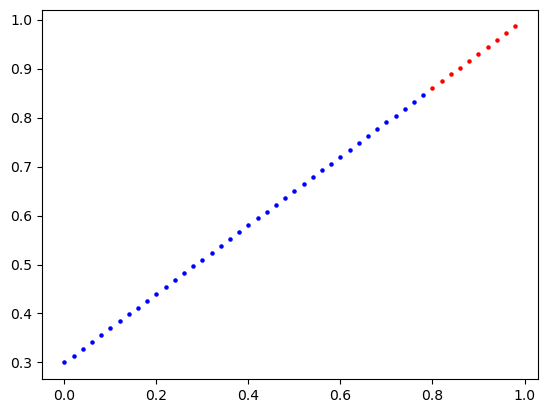

In [28]:
def plt_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = xtest,
                    test_labels = ytest,
                    predictions = None):
    
    plt.scatter(train_data, train_labels, color="blue", label="Training data", s=5)
    plt.scatter(test_data, test_labels, color="red", label="Testing data", s=5)
    if predictions is not None:
        plt.scatter(test_data, predictions, color="green", label="Predictions", s=5)

plt_predictions()


In [ ]:
#our first pytorch model
#linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__() 
        self.weight = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float  )) #weights are trainable parameters
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        
        #forward method
    def forward(self, X: torch.Tensor) -> torch.Tensor:
        return self.weight * X + self.bias 
#here what our model does it it starts with random values and look at training data and adjust the random values to better present the ideal values

#for this we use 2 main algirithms 1. gradient descent 2. backpropagation we dont need to create this torch will do this for us!
  

In [125]:
#checking the contents of our model
#create a seed
torch.manual_seed(42)
#create an instance of the model
model_0 =LinearRegressionModel()
print(model_0)
print(model_0.parameters)
print(list(model_0.parameters()))
#now u may have a doubt that we are passing random value at the model creation time then how can weget the same output every time we run the code because we are using the seed concept here

LinearRegressionModel()
<bound method Module.parameters of LinearRegressionModel()>
[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [56]:
#le me give u a another ex:
torch.rand(1)#here each time the value will change discretely

tensor([0.9346])

In [74]:
from torch import manual_seed as ms
ms(42)
torch.rand(1)#now it will give the same value every time we run the code

tensor([0.8823])

In [121]:
#to list named parameters
model_0.state_dict()#we need to get the weight tensor and bias tensor near to our original values which is 0.7 and 0.3

OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])

In [110]:
#lets make prediction using torch.inference_mode()

with torch.inference_mode():#context manager to turn off gradient tracking
    y_preds = model_0(xtest)

print(y_preds)


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


In [111]:
ytest

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

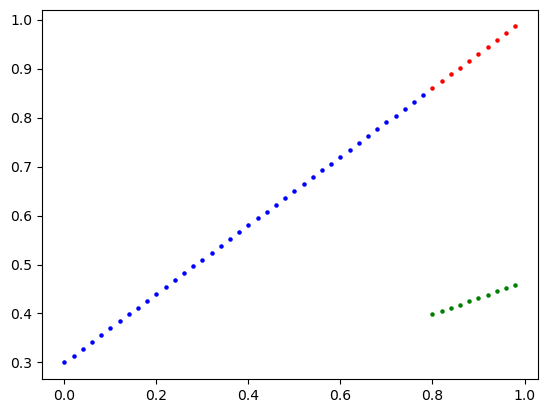

In [112]:
plt_predictions(predictions=y_preds)

Loss function - which is used to measure the difference between the model predicted op and the original op'--

In [142]:
#set up a loss function
loss_fn = nn.L1Loss()
#setup a optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01) #stochastic gradient descent and lr is learning rate.

In [203]:
#now u see the prediction is so poor so we need to train the model
#training loop
epochs = 100

epoch_count = []
trainloss_values=[]
test_loss_values = []

for epoch in range(epochs):
    model_0.train()
    
    # forward pass
    y_pred = model_0(X_train)
    
    # calculate the loss
    loss = loss_fn(y_pred, y_train)
    print(f"loss:{loss}")
    # zero grad
    optimizer.zero_grad()
    
    # backprop
    loss.backward()
    
    # step
    optimizer.step()

    # evaluation inside the loop
    model_0.eval()
    with torch.inference_mode():
        test_preds = model_0(xtest)
        test_loss = loss_fn(test_preds, ytest)

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            trainloss_values.append(loss.item())
            test_loss_values.append(test_loss.item())
            print(f"epoch:{epoch} | test loss:{test_loss.item():.4f} | train loss:{loss.item():.4f}")

    


loss:0.008932482451200485
epoch:0 | test loss:0.0050 | train loss:0.0089
loss:0.0025885067880153656
loss:0.008932482451200485
loss:0.0025885067880153656
loss:0.008932482451200485
loss:0.0025885067880153656
loss:0.008932482451200485
loss:0.0025885067880153656
loss:0.008932482451200485
loss:0.0025885067880153656
loss:0.008932482451200485
epoch:10 | test loss:0.0050 | train loss:0.0089
loss:0.0025885067880153656
loss:0.008932482451200485
loss:0.0025885067880153656
loss:0.008932482451200485
loss:0.0025885067880153656
loss:0.008932482451200485
loss:0.0025885067880153656
loss:0.008932482451200485
loss:0.0025885067880153656
loss:0.008932482451200485
epoch:20 | test loss:0.0050 | train loss:0.0089
loss:0.0025885067880153656
loss:0.008932482451200485
loss:0.0025885067880153656
loss:0.008932482451200485
loss:0.0025885067880153656
loss:0.008932482451200485
loss:0.0025885067880153656
loss:0.008932482451200485
loss:0.0025885067880153656
loss:0.008932482451200485
epoch:30 | test loss:0.0050 | train 

In [ ]:
import numpy as np

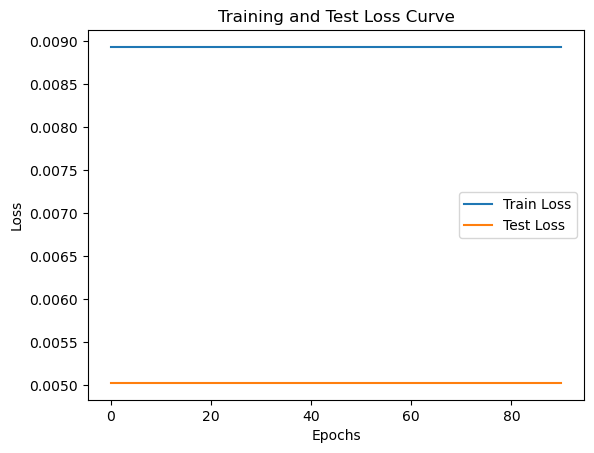

In [204]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(epoch_count, trainloss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and Test Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [193]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [171]:
#run training loop epoch by epoch and see what happens
print("Before training:", model_0.state_dict())
# training block
model_0.train()
y_pred = model_0(X_train)
loss = loss_fn(y_pred, y_train)
optimizer.zero_grad()
loss.backward()
optimizer.step()

print("After training:", model_0.state_dict())


Before training: OrderedDict({'weight': tensor([0.6951]), 'bias': tensor([0.2993])})
After training: OrderedDict({'weight': tensor([0.6990]), 'bias': tensor([0.3093])})


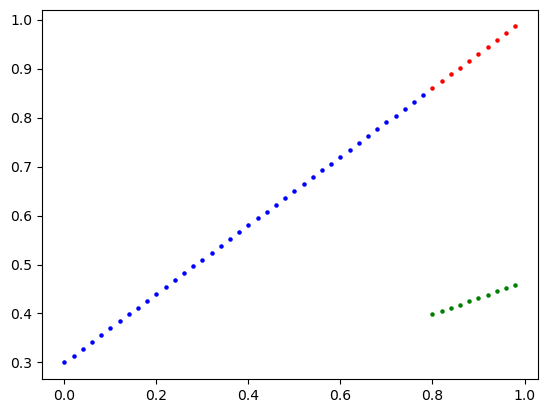

In [172]:
plt_predictions(predictions=y_preds) #old predictions

In [173]:
with torch.inference_mode():#context manager to turn off gradient tracking
    new_preds = model_0(xtest)

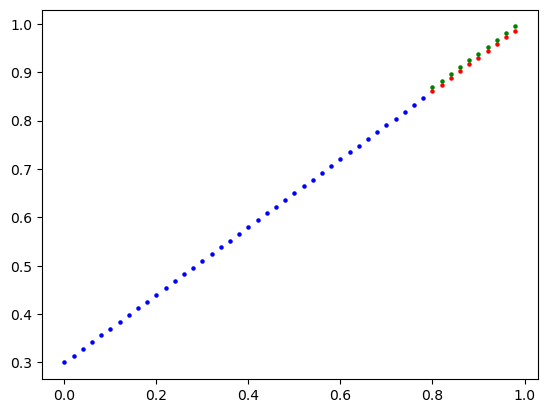

In [175]:
plt_predictions(predictions=new_preds) #old predictions

#saving a model in pytorch
#there are 3 main methods which is used to save and load the models in pytorch
torch.save(),torch.load(),torch.nn.Module.load_state_dict()


In [207]:
from pathlib import Path
#1.create model directory
model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True) #create the directory if it doesn't exist
#2.create model save path
model_name = "linear_regression_model.pth"
model_save_path = model_path / model_name

#3.save the model state dict
torch.save(obj=model_0.state_dict(), f=model_save_path)

In [208]:
#to load the saved state_dict we have to instantiate a new instance of our model class

load_model = LinearRegressionModel()
#load saved state_dict

load_model.load_state_dict(torch.load(f=model_save_path))

<All keys matched successfully>

In [210]:
print(model_0.state_dict())
print(load_model.state_dict())

OrderedDict({'weight': tensor([0.6990]), 'bias': tensor([0.3093])})
OrderedDict({'weight': tensor([0.6990]), 'bias': tensor([0.3093])})
